In [1]:
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df=df[df['species']!='setosa']

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [12]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [15]:
## splitting my datsset into dependent and independent dataset

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test =train_test_split(
    X,y, test_size=0.25, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()


In [28]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2', 'elasticnet' ],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}


In [29]:
classifier_regression=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [30]:
classifier_regression.fit(X_train,y_train)

C:\Users\ssaim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ssaim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ssaim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ssaim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [32]:
print(classifier_regression.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [33]:
print(classifier_regression.best_score_)

0.9733333333333334


In [35]:
##prediction

y_pred=classifier_regression.predict(X_test)

In [36]:
#accuracy score

from sklearn.metrics import accuracy_score,classification_report

In [38]:
score=accuracy_score(y_pred,y_test)
print(score)

0.92


In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



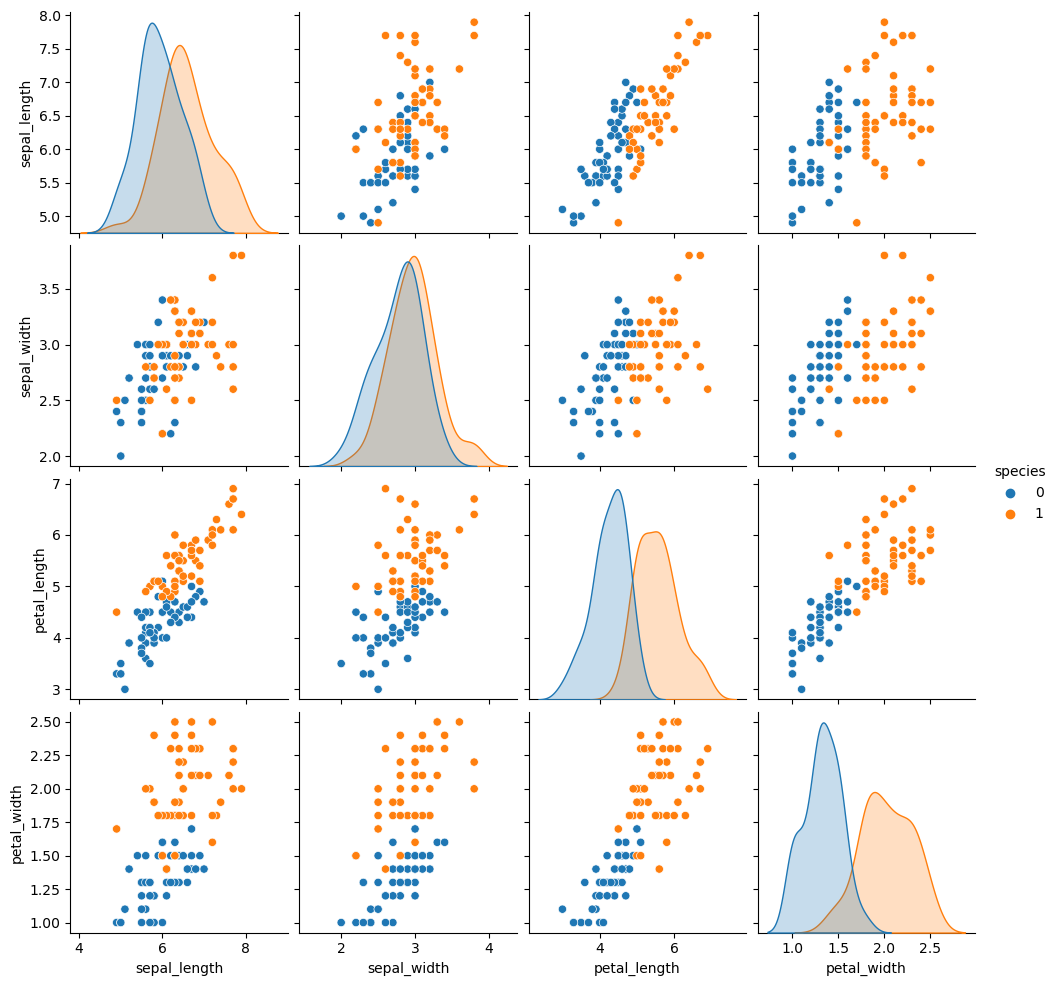

In [40]:
#eda
sns.pairplot(df,hue='species')

In [41]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
